In [1]:
# Data Processing
import pandas as pd
import numpy as np
import math

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_squared_error

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
# load dataset
df = pd.read_csv("dataset_2016.csv")
df.head()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7,location,month
0,1.0,3.0,2.0,1.0,3.0,4040.0,3.0,30.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,3.0,1.0,1.0,3.0,4040.0,6.0,30.0,1.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,1.0,3.0,2.0,2.0,6.0,0.0,6.0,30.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
3,1.0,3.0,2.0,1.0,3.0,4040.0,3.0,30.0,0.0,1.0,...,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
4,1.0,2.0,1.0,1.0,3.0,4040.0,3.0,30.0,0.0,0.0,...,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [3]:
#split dataset in features and target variable
X = df.drop(["no_of_accidents"], axis=1)  # Features
y = df["no_of_accidents"]  # Target Variable
print(X.shape)
print(y.shape)

(9445, 28)
(9445,)


In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [5]:
# Fitting and Evaluating the Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9438955539872971


In [7]:
y_score = rf.score(X_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
from sklearn.metrics import precision_score

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
    micro_precision))

per_class_precision = precision_score(y_pred, y_test, average="weighted")
print('Per-class precision score:', per_class_precision)

Accuracy:  0.9438955539872971
Micro-averaged precision score: 0.94
Per-class precision score: 0.9570921641600005


In [8]:
mse = mean_squared_error(y_test, y_pred)

root_mse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(root_mse)

Root Mean Square Error:

0.31432512194624346


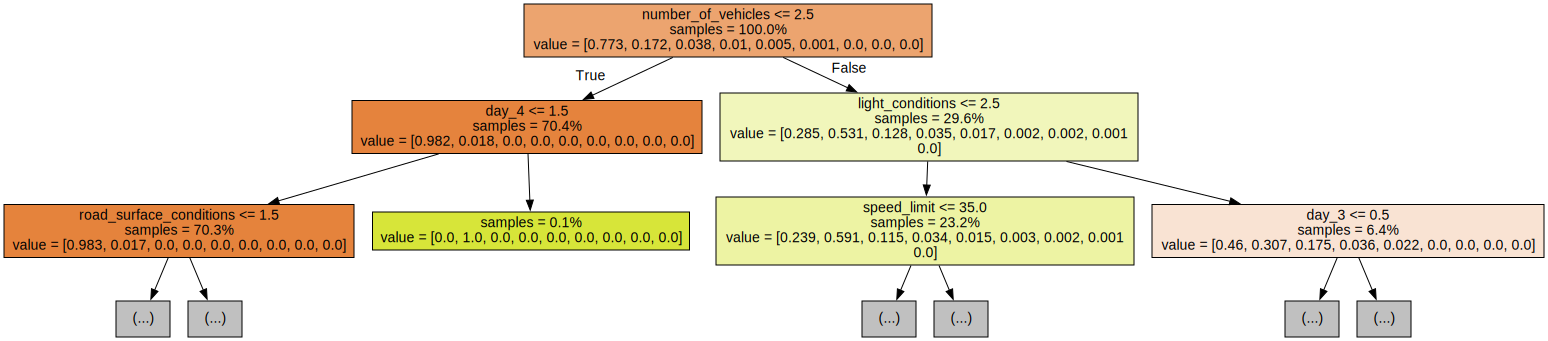

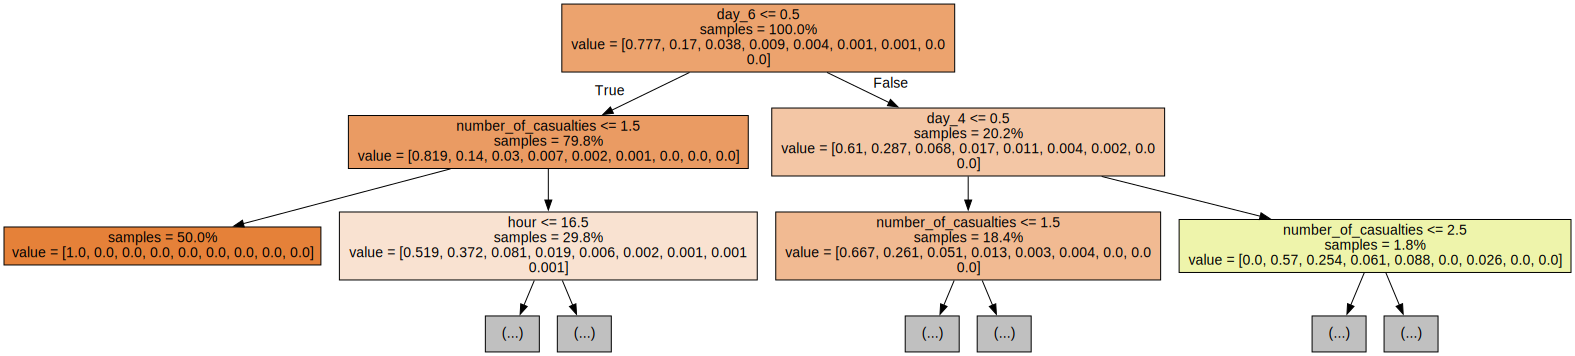

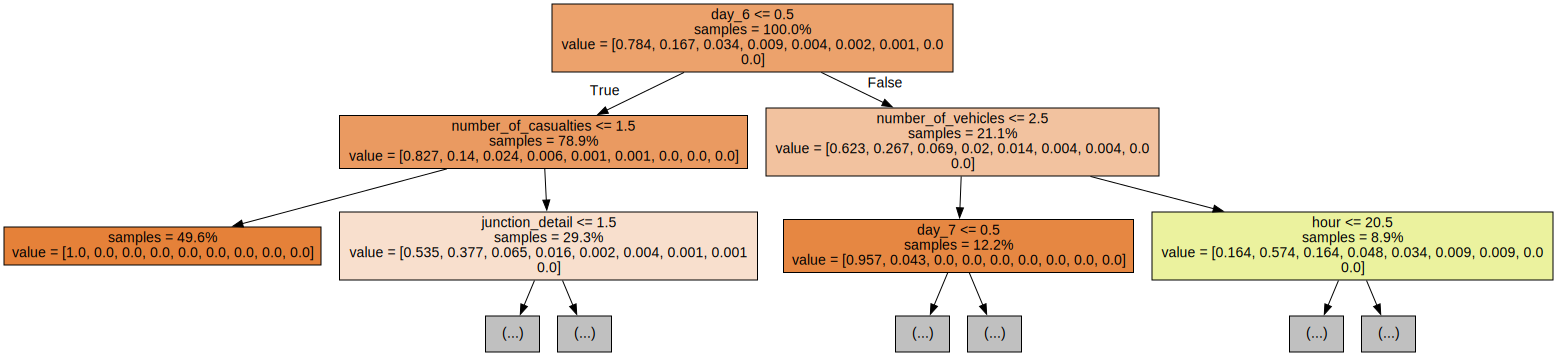

In [9]:
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)